<a href="https://colab.research.google.com/github/wayhome/colab/blob/main/gemini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U google-generativeai


In [4]:
import os
import google.generativeai as genai
from google.colab import userdata
from IPython.display import Markdown

GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

In [2]:
!curl -o gemini.pdf https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2403.05530.pdf

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 7059k  100 7059k    0     0  9462k      0 --:--:-- --:--:-- --:--:-- 9462k


In [5]:
# Upload the file and print a confirmation
sample_file = genai.upload_file(path="gemini.pdf",
                                display_name="Gemini 1.5 PDF")

print(f"Uploaded file '{sample_file.display_name}' as: {sample_file.uri}")

Uploaded file 'Gemini 1.5 PDF' as: https://generativelanguage.googleapis.com/v1beta/files/6mabbt7cwr6q


In [6]:
file = genai.get_file(name=sample_file.name)
print(f"Retrieved file '{file.display_name}' as: {sample_file.uri}")

Retrieved file 'Gemini 1.5 PDF' as: https://generativelanguage.googleapis.com/v1beta/files/6mabbt7cwr6q


In [7]:
# Choose a Gemini model.
model = genai.GenerativeModel(model_name="gemini-1.5-flash")

# Prompt the model with text and the previously uploaded image.
response = model.generate_content([sample_file, "您能以项目符号列表的形式总结此文档吗？"])

print(response.text)

当然，以下列出了此文档的摘要：

- Gemini 1.5 Pro 是一种多模式混合专家模型，可以理解长达 1000 万个标记的上下文。
- 该模型在各种基准测试中优于现有的模型，包括长文本、视频和音频。
- Gemini 1.5 Pro 可以进行零样本翻译，并且可以在给定少量语言数据的情况下，学习翻译新的语言。
- 该模型还具有强大的推理能力，能够回答关于长文档的问题。
- 尽管该模型具有令人印象深刻的性能，但它也存在一些局限性，包括其对攻击的敏感性。
- Google 对 Gemini 1.5 Pro 采取了负责任的部署方法，包括影响评估、缓解措施和安全性评估。
- 为了促进长上下文评估的发展，作者建议研究人员使用多针草堆任务或使用需要复杂的推理才能解决的长期上下文任务。
- 该文档中还介绍了用于不同任务的提示策略，以及用于评估这些任务的自动评分方法。
- 此外，还提供了有关 Gemini 1.5 Pro 在各种核心能力方面性能的详细细目。


In [9]:
!curl -o jetpack.jpg https://storage.googleapis.com/generativeai-downloads/images/jetpack.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  349k  100  349k    0     0  2188k      0 --:--:-- --:--:-- --:--:-- 2196k


In [21]:
# Upload the file and print a confirmation.
sample_file = genai.upload_file(path="jetpack.jpg",
                            display_name="Jetpack drawing")

print(f"Uploaded file '{sample_file.display_name}' as: {sample_file.uri}")

Uploaded file 'Jetpack drawing' as: https://generativelanguage.googleapis.com/v1beta/files/s5j8ugcngcx9


In [17]:
# Prompt the model with text and the previously uploaded image.
response = model.generate_content([sample_file, "描述一下这个产品的生产方式."])

Markdown(">" + response.text)

>这个产品是一种背包，它是一个普通的背包，但它有可伸缩的助推器，让它可以飞起来。 助推器由蒸汽驱动，并使用环保的清洁能源。  


In [18]:
!curl https://storage.googleapis.com/generativeai-downloads/images/piranha.jpg -o piranha.jpg
!curl https://storage.googleapis.com/generativeai-downloads/images/firefighter.jpg -o firefighter.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1146k  100 1146k    0     0  5356k      0 --:--:-- --:--:-- --:--:-- 5382k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  534k  100  534k    0     0   745k      0 --:--:-- --:--:-- --:--:--  745k


In [ ]:
sample_file_1 = genai.upload_file(path="piranha.jpg",
                            display_name="Piranha")
sample_file_2 = genai.upload_file(path="firefighter.jpg",
                            display_name="Firefighter")


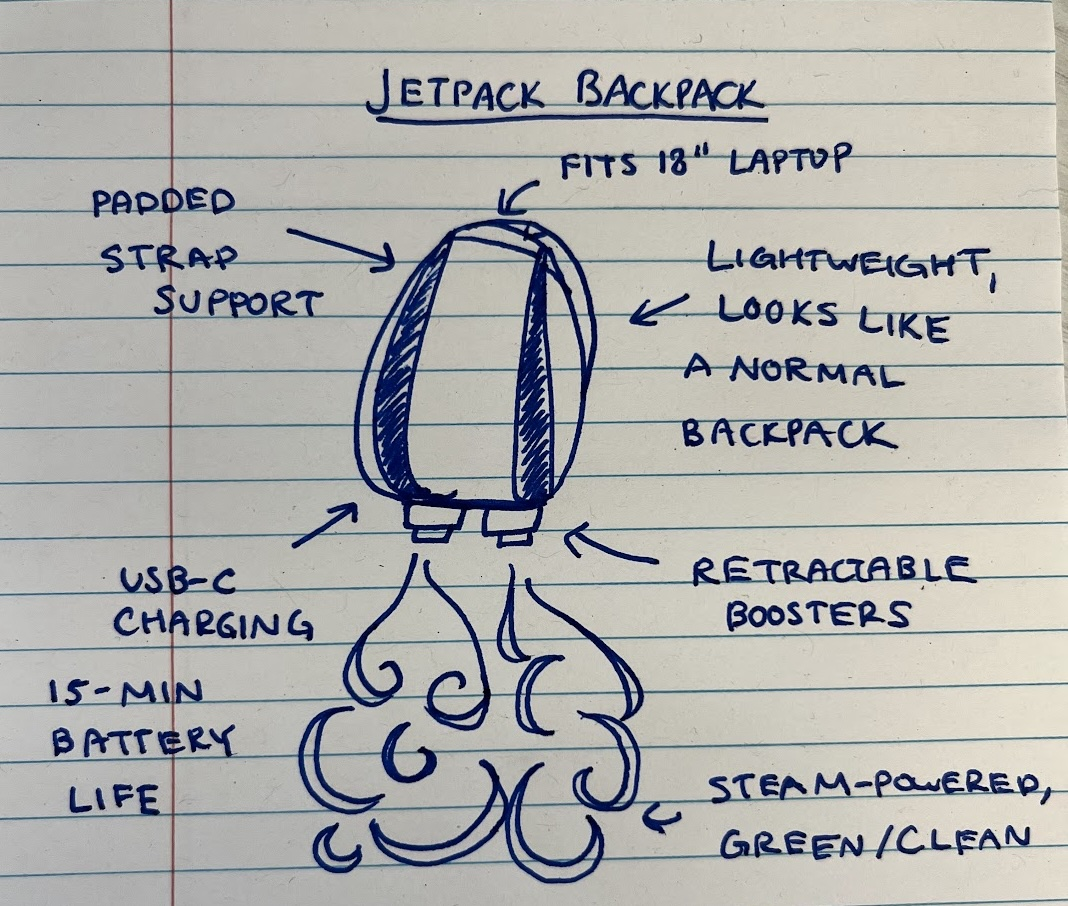

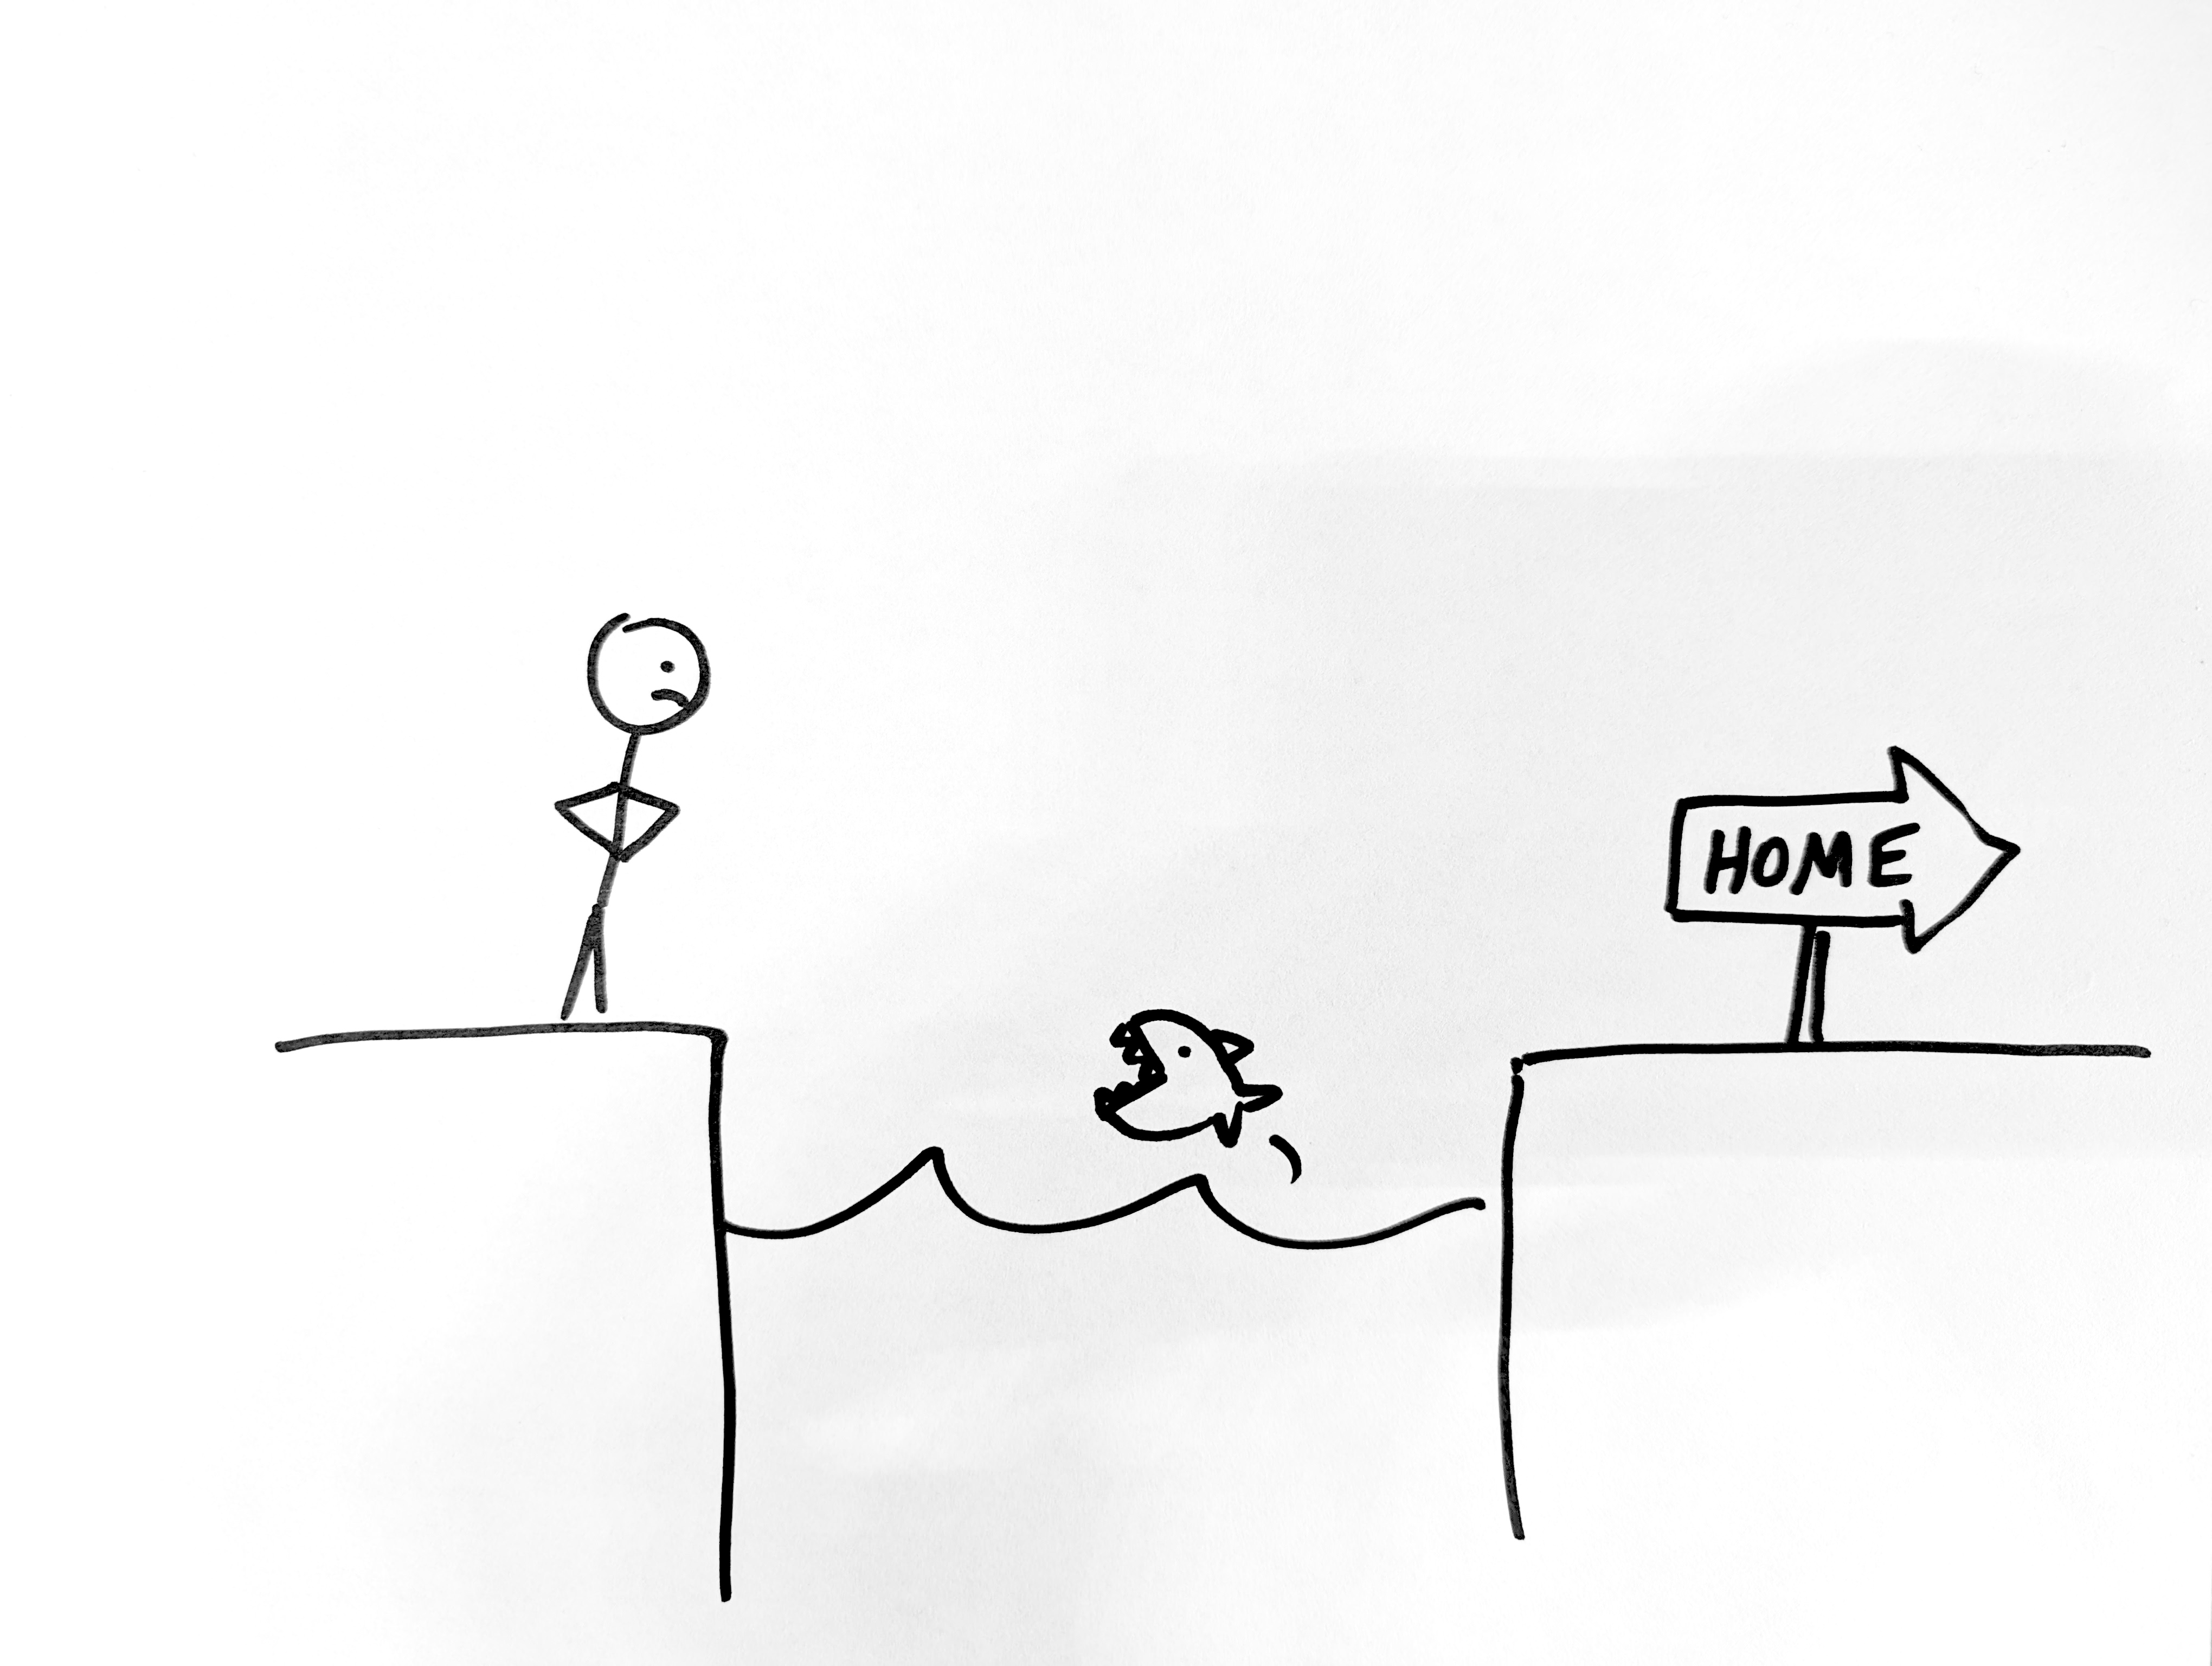

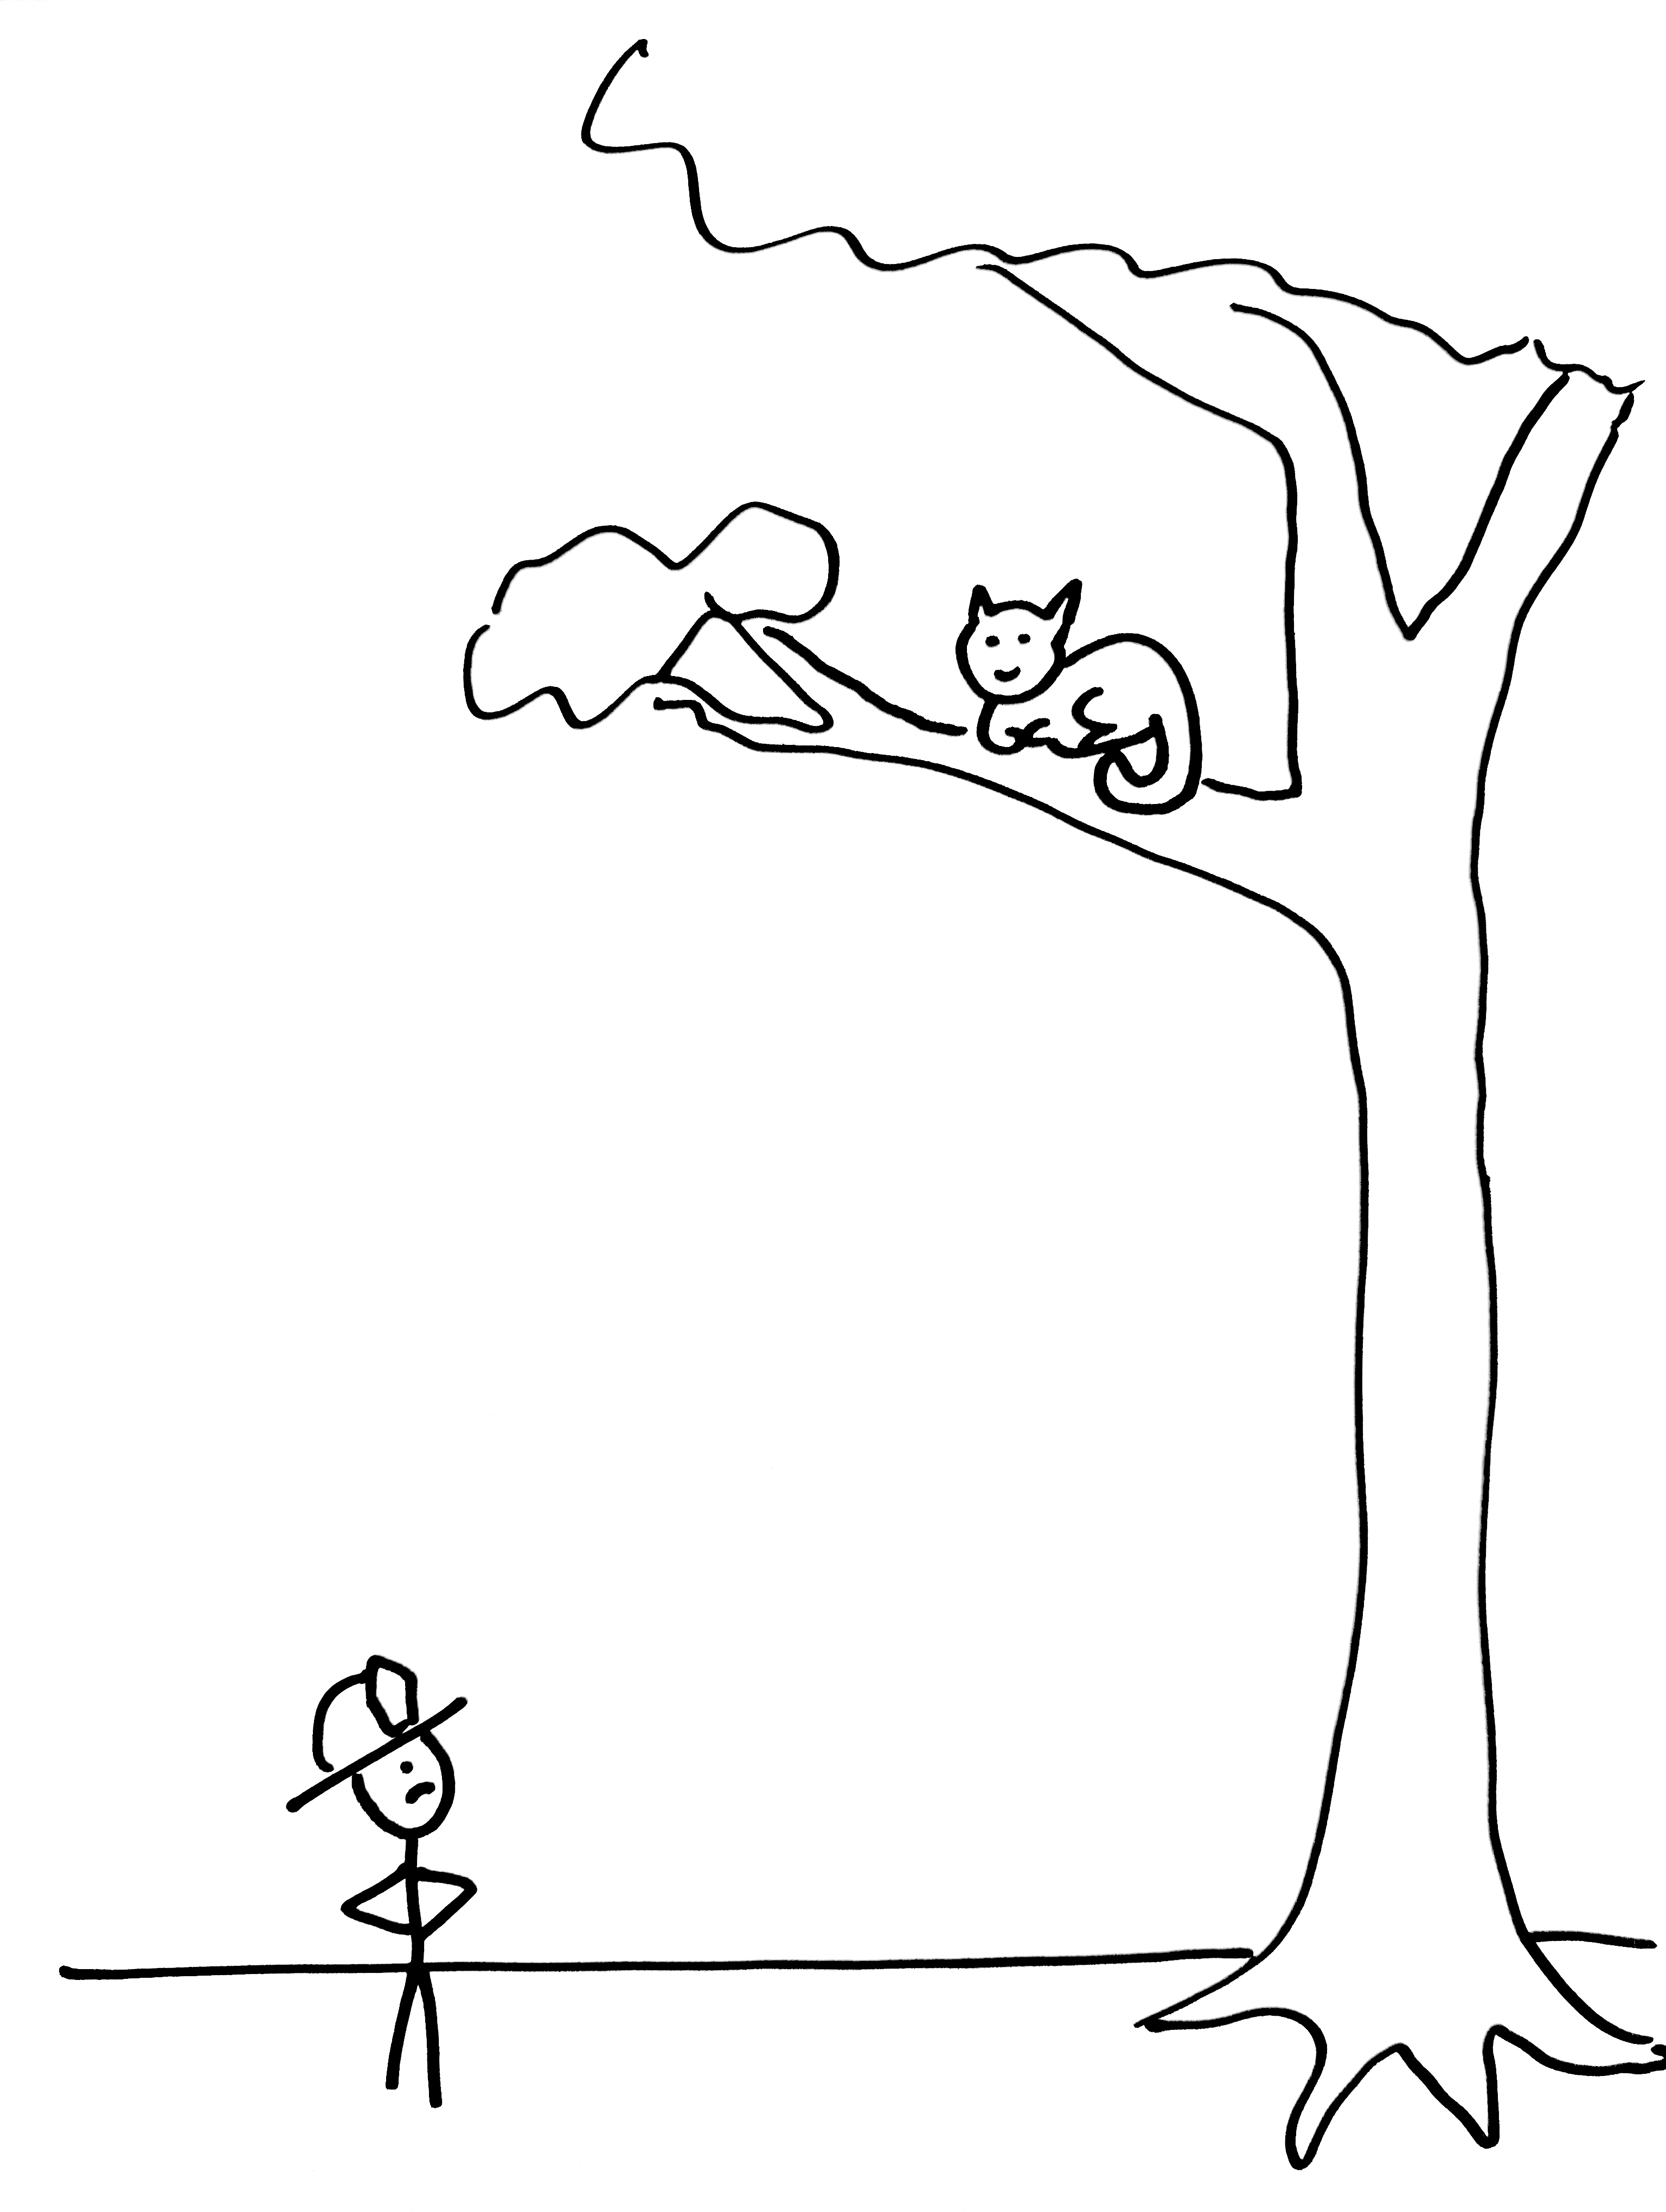

In [26]:
from IPython.display import Image, display

display(Image(filename='jetpack.jpg', width=300, height=300))
display(Image(filename='piranha.jpg', width=300, height=300))

display(Image(filename='firefighter.jpg', width=300, height=300))


In [27]:
prompt = "编写一个广告词，展示第一张图片中的产品如何解决后两张图片中显示的问题。."
response = model.generate_content([prompt, sample_file, sample_file_1, sample_file_2])
Markdown(">" + response.text)

>Tired of being stuck?  Jetpack Backpack:  Get home, get that cat, and never worry about traffic again!  Get yours today!  Limited quantities.

In [28]:
prompt = "Return a bounding box for the piranha. \n [ymin, xmin, ymax, xmax]"
response = model.generate_content([sample_file_1, prompt])

print(response.text)

The bounding box is: [606, 501, 706, 605].


In [22]:
for file in genai.list_files():
    print(f"{file.display_name}, URI: {file.uri}")

Jetpack drawing, URI: https://generativelanguage.googleapis.com/v1beta/files/s5j8ugcngcx9
Firefighter, URI: https://generativelanguage.googleapis.com/v1beta/files/4jdygorq55po
Piranha, URI: https://generativelanguage.googleapis.com/v1beta/files/wi5s6qy25sm4
Jetpack drawing, URI: https://generativelanguage.googleapis.com/v1beta/files/2pyu2r7pjedm
Gemini 1.5 PDF, URI: https://generativelanguage.googleapis.com/v1beta/files/6mabbt7cwr6q
